## 15.2.2 Loading the Dataset

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()

In [6]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [8]:
digits.data.shape

(1797, 64)

In [9]:
digits.target.shape

(1797,)

# 15.2.3 Visualizing the Data

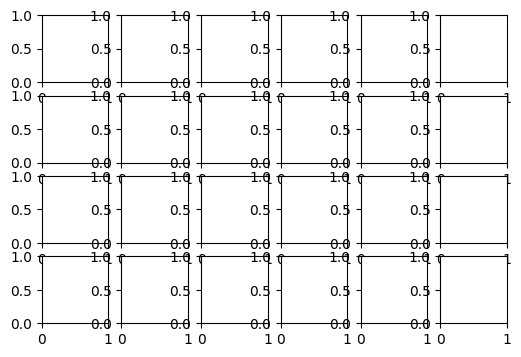

In [11]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

In [12]:
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

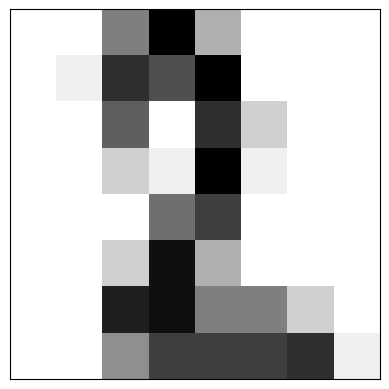

In [15]:
axes = plt.subplot()
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)
xticks = axes.set_xticks([])
yticks = axes.set_yticks([])


# 15.2.4 Splitting the Data for Training and Testing

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target, random_state=11)

In [19]:
X_train.shape

(1347, 64)

In [20]:
X_test.shape

(450, 64)

# 15.2.5 Creating the Model

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# 15.2.6 Training the Model

In [23]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

# 15.2.7 Predicting Digit Classes

In [25]:
predicted = knn.predict(X=X_test)

expected = y_test

In [26]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [27]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [28]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

# 15.3 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset

In [29]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


In [32]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report

names = [str(digit) for digit in digits.target_names]

print(classification_report(expected, predicted,
                            target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



# Visualizing the Confusion Matrix

In [35]:
import pandas as pd

confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

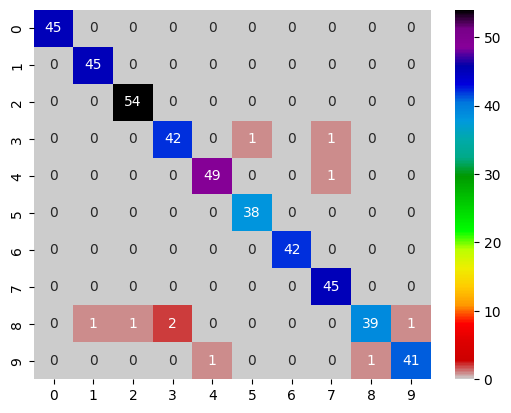

In [36]:
import seaborn as sns

axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

# 15.3.2 K-Fold Cross-Validation

In [37]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [41]:
print(f'Mean accuracy: {scores.mean():.2%}')

print(f'Accuracy standard deviation: {scores.std():.2%}')

Mean accuracy: 98.72%
Accuracy standard deviation: 0.75%


# 15.3.3 Running Multiple Models to Find the Best One

In [42]:
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

In [43]:
estimators = {
   'KNeighborsClassifier': knn,
   'SVC': SVC(gamma='scale'),
   'GaussianNB': GaussianNB()}

In [44]:
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object,
         X=digits.data, y=digits.target, cv=kfold)
     print(f'{estimator_name:>20}: ' +
         f'mean accuracy={scores.mean():.2%}; ' +
         f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


# 15.3.4 Hyperparameter Tuning

In [45]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
        X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.39%; standard deviation=0.80%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%


# 15.4 Case Study: Time Series and Simple Linear Regression

In [49]:
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2023.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,71.62,-0.48
1,1896,72.27,0.17
2,1897,71.35,-0.75


# Splitting the Data for Training and Testing

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)

In [51]:
X_train.shape

(96, 1)

In [52]:
X_test.shape

(33, 1)

# Training the Model

In [54]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [55]:
linear_regression.coef_

array([0.01296065])

In [56]:
linear_regression.intercept_

46.96584944460682

# Testing the Model

In [57]:
predicted = linear_regression.predict(X_test)

expected = y_test

In [58]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 71.53, expected: 71.62
predicted: 72.37, expected: 72.21
predicted: 72.52, expected: 71.67
predicted: 72.95, expected: 73.20
predicted: 72.99, expected: 72.28
predicted: 72.87, expected: 72.91
predicted: 71.81, expected: 71.02


# Predicting Future Temperatures and Estimating Past Temperatures

In [59]:
predict = (lambda x: linear_regression.coef_ * x +
linear_regression.intercept_)

In [60]:
predict(2023)

array([73.18525132])

In [61]:
predict(2090)

array([74.0536151])

# Visualizing the Dataset with the Regression Line

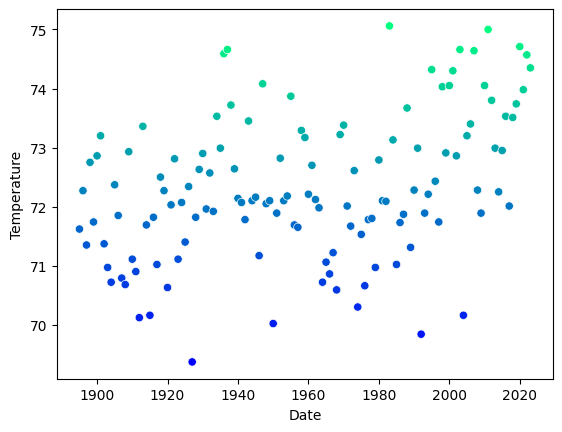

In [62]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

In [63]:
axes.set_ylim(60, 80)

(60.0, 80.0)

In [65]:
import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

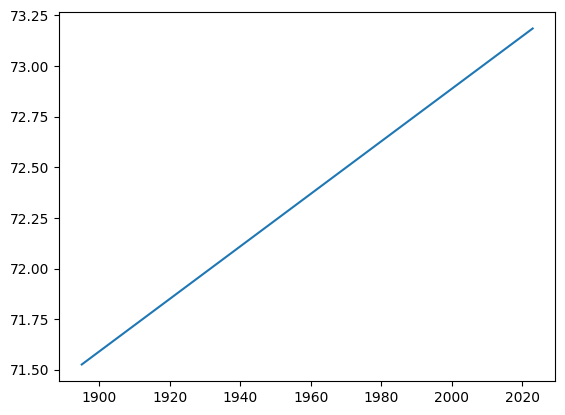

In [66]:
import matplotlib.pyplot as plt

line = plt.plot(x, y)